# Exploratory Data Analysis

In [5]:
#Pobranie bibliotek i inicjalizacja zmiennych.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plec_kod = [0, 1]
plec_label = ['Mężczyźni', 
              'Kobiety']

edukacja_kod = [0, 1, 2, 3, 4, 5, 6, 7, 8]
edukacja_label = ['Bez matury', 
                  'Matura', 
                  'Licencjat', 
                  'Inżynier', 
                  'Magister', 
                  'Magister Inż.', 
                  'Podyplomowe', 
                  'MBA', 
                  'doktor']

wojewodztwo_kod = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
wojewodztwo_label = ['Dolnośląskie', 
                     'Kujawsko-Pomorskie', 
                     'Lubelskie', 
                     'Lubuskie', 
                     'Łódzkie', 
                     'Małopolskie', 
                     'Mazowieckie', 
                     'Opolskie', 
                     'Podkarpackie', 
                     'Podlaskie', 
                     'Pomorskie', 
                     'Śląskie', 
                     'Świętokrzyskie', 
                     'Warmińsko-Mazurskie', 
                     'Wielkopolskie', 
                     'Zachodniopomorskie']

wielkosc_kod = [1, 2, 3, 4]
wielkosc_label = ['wieś', 'miasto do 20 tys.', 'miasto od 20 tys. do 100 tys.', 'miasto powyzej 100 tys.']


In [6]:
#Załadowanie zmiennych
df = pd.read_excel(r"C:\Users\Tomek\Desktop\wagesInPoland2021\artefacts\dataTrusted.xlsx")
print(df.head(1))

   plec  edukacja  doswiadczenie  woj  miejsce  pensja  najwyzsze  matura  \
0     0         0             39   14        2    2500        NaN       0   

   doswiadczenie_log  
0           3.688879  


## Płeć

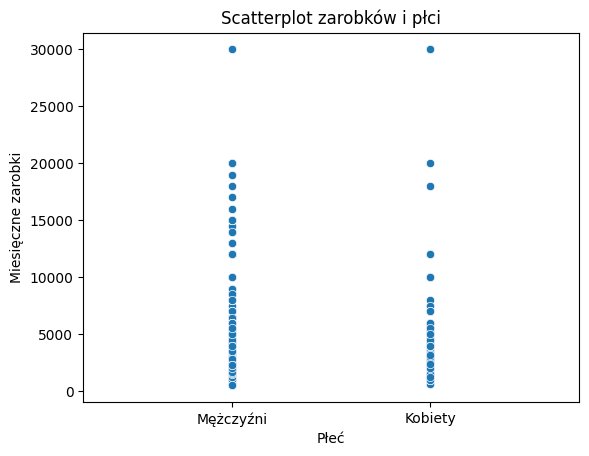

In [7]:
sns.scatterplot(data = df, y = "pensja", x = 'plec')

plt.xlabel('Płeć')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i płci')
plt.xticks(plec_kod, plec_label )
plt.xlim(-0.75, 1.75)

plt.show()

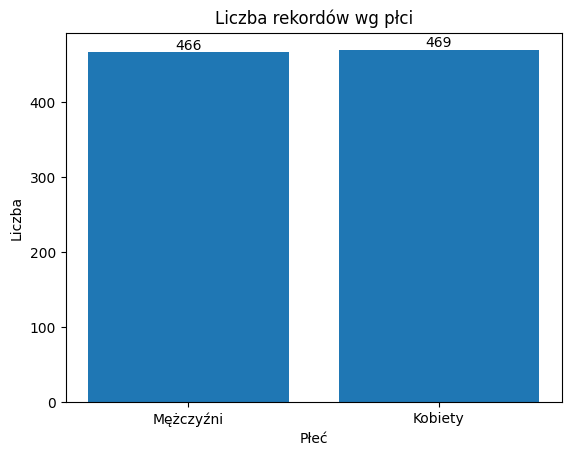

In [8]:
unique_values, counts = np.unique(df['plec'], return_counts=True)

plt.bar(unique_values, counts)

filtered_values = unique_values[np.isin(unique_values, plec_kod)]
filtered_counts = counts[np.isin(unique_values, plec_kod)]
plt.xticks(filtered_values, plec_label)
plt.xlabel('Płeć')
plt.ylabel('Liczba')
plt.title('Liczba rekordów wg płci')

for x, y in zip(filtered_values, filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

## Edukacja

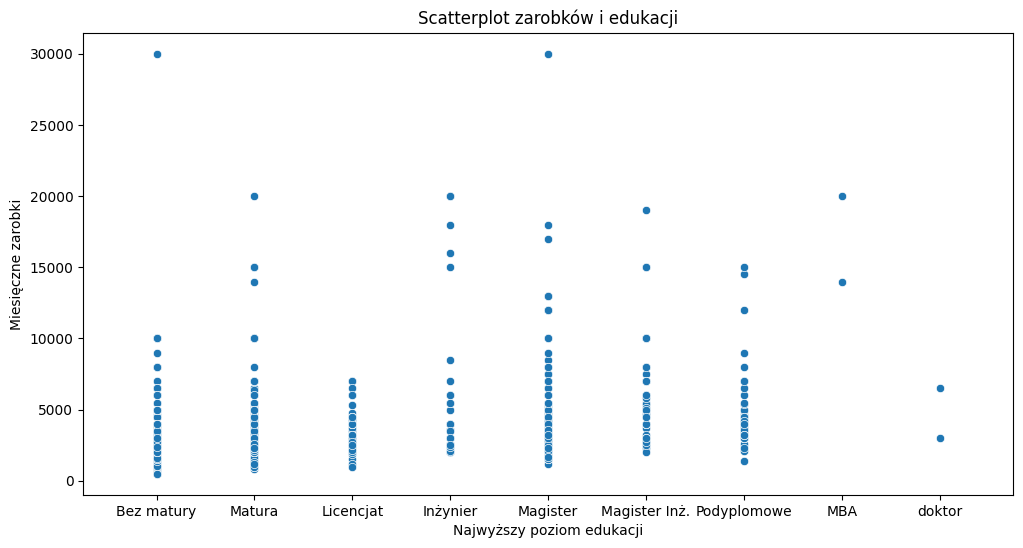

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y="pensja", x="edukacja")

plt.xlabel('Najwyższy poziom edukacji')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i edukacji')
plt.xticks(edukacja_kod, edukacja_label)
plt.xlim(-0.75, 8.75)

plt.show()

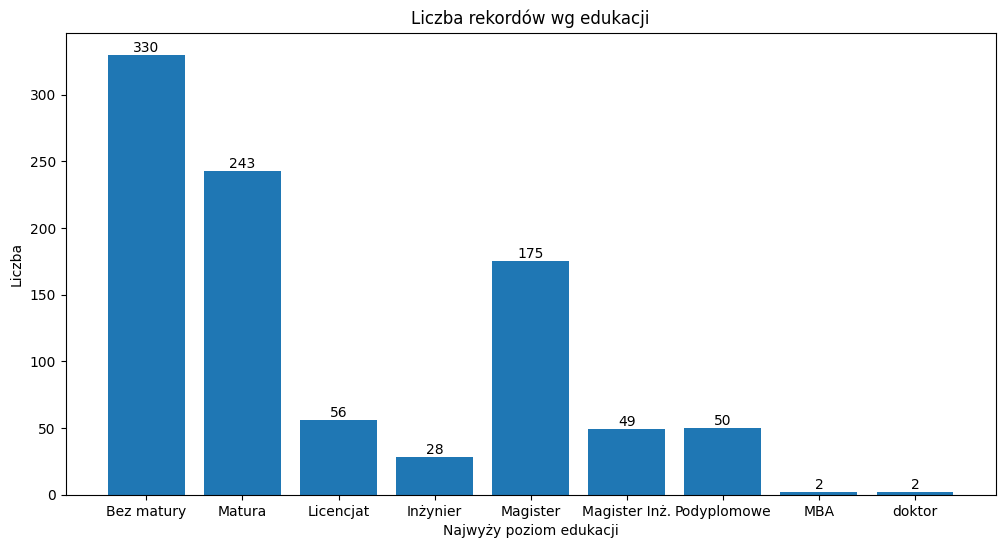

In [10]:
plt.figure(figsize=(12, 6))

unique_values, counts = np.unique(df['edukacja'], return_counts=True)

plt.bar(unique_values, counts)

filtered_values = unique_values[np.isin(unique_values, edukacja_kod)]
filtered_counts = counts[np.isin(unique_values, edukacja_kod)]
plt.xticks(filtered_values, edukacja_label)
plt.xlabel('Najwyży poziom edukacji')
plt.ylabel('Liczba')
plt.title('Liczba rekordów wg edukacji')

for x, y in zip(filtered_values, filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

## Doświadczenie
### Przed log

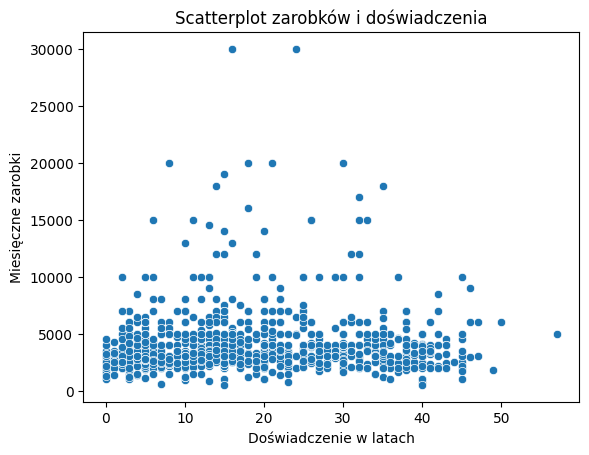

In [11]:
sns.scatterplot(data = df, y = "pensja", x = 'doswiadczenie')

plt.xlabel('Doświadczenie w latach')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i doświadczenia')
# plt.xticks([0, 1], ['Mężczyźni', 'Kobiety'])
# plt.xlim(-0.75, 1.75)

plt.show()

### Po log

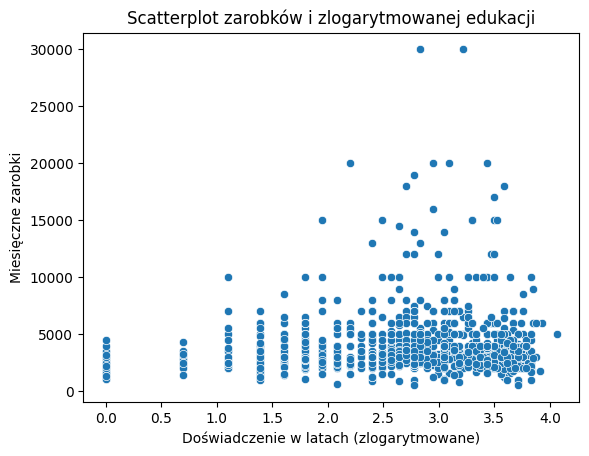

In [12]:
sns.scatterplot(data = df, y = "pensja", x = 'doswiadczenie_log')

plt.xlabel('Doświadczenie w latach (zlogarytmowane)')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i zlogarytmowanej edukacji')


plt.show()

## Województwo

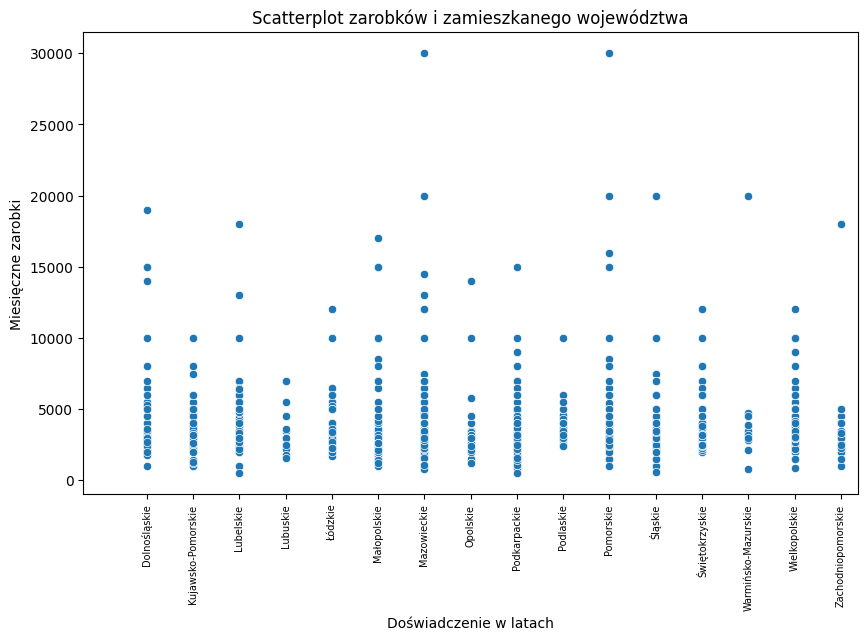

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, y = "pensja", x = 'woj')

plt.xlabel('Doświadczenie w latach')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i zamieszkanego województwa')

plt.xticks(wojewodztwo_kod, wojewodztwo_label, fontsize=7)
plt.xlim(-0.75, 32.75)
plt.xticks(rotation=90) 


plt.show()

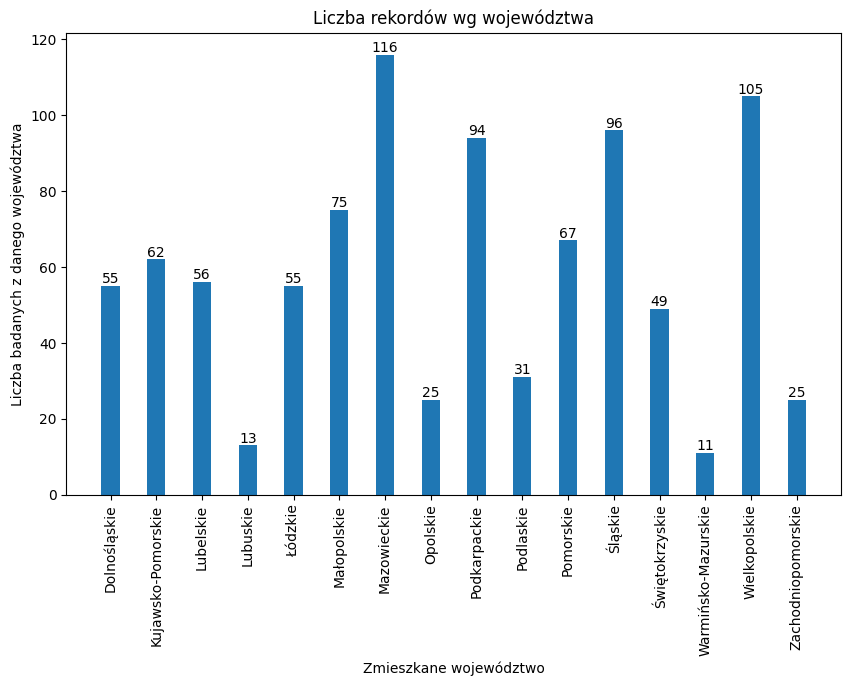

In [78]:
plt.figure(figsize=(10, 6))

unique_values, counts = np.unique(df['woj'], return_counts=True)

plt.bar(unique_values, counts)

filtered_values = unique_values[np.isin(unique_values, wojewodztwo_kod)]
filtered_counts = counts[np.isin(unique_values, wojewodztwo_kod)]
plt.xticks(filtered_values, wojewodztwo_label)
plt.xlabel('Zmieszkane województwo')
plt.ylabel('Liczba badanych z danego województwa')
plt.title('Liczba rekordów wg województwa')
plt.xticks(rotation=90) 

for x, y in zip(filtered_values, filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

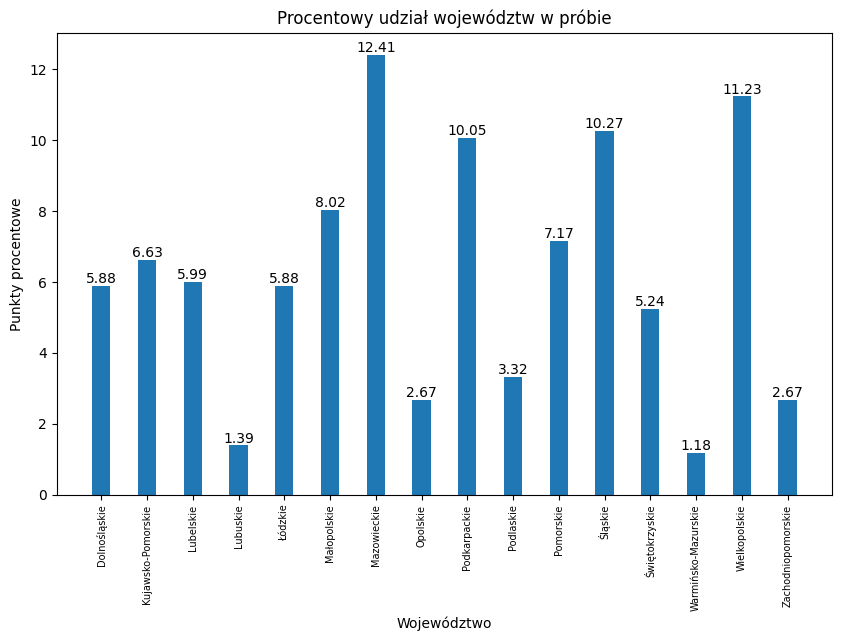

In [47]:
liczba_obserwacji = 935
policz_woj = df['woj'].value_counts()

procenty = (policz_woj / liczba_obserwacji)*100
procenty_df = procenty.reset_index()
procenty_df.columns = ['województwo', 'procent próby']

plt.figure(figsize=(10, 6)) 
bars = plt.bar(procenty.index, procenty.values)
plt.xticks(wojewodztwo_kod, wojewodztwo_label, fontsize = 7)
plt.xlabel('Województwo')
plt.ylabel('Punkty procentowe')
plt.title('Procentowy udział województw w próbie')
plt.xticks(rotation=90)  
for bar, value in zip(bars, procenty.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()






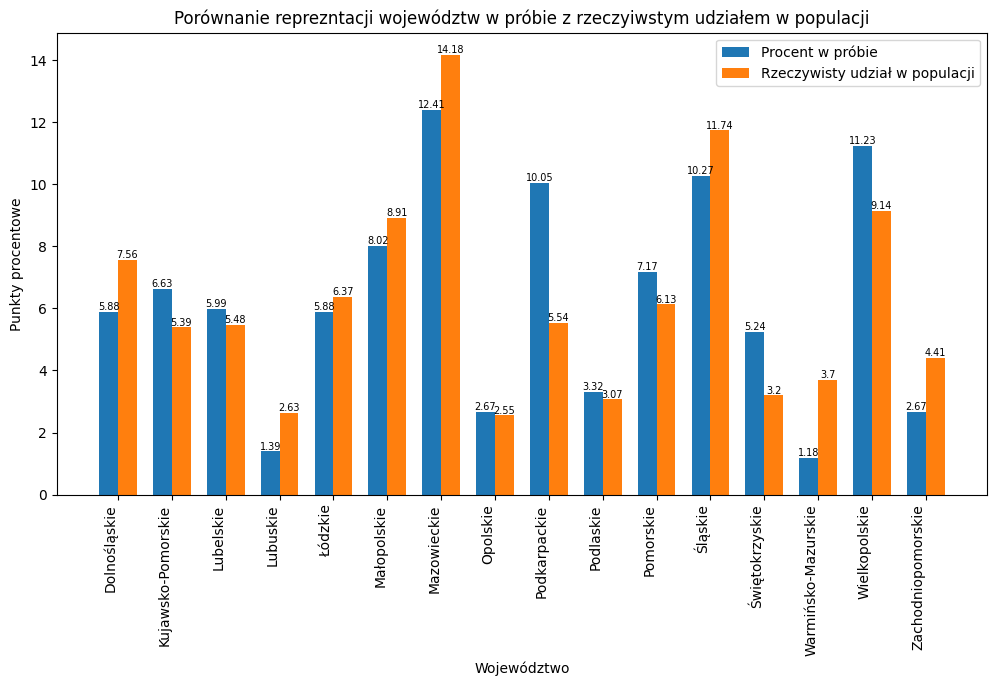

In [118]:
## Liczba rekordkow przez liczbe mieszkancow wg wojewodztwa
plt.figure(figsize=(12, 6)) 
procenty_df['procent próby'] = procenty_df['procent próby'].round(2)
rzeczywiste_procenty = [
    7.56,
    5.39,
    5.48,
    2.63,
    6.37,
    8.91,
    14.18,
    2.55,
    5.54,
    3.07,
    6.13,
    11.74,
    3.20,
    3.70,
    9.14,
    4.41
]

woj_mapping = {
    2: rzeczywiste_procenty[0],
    4: rzeczywiste_procenty[1],
    6: rzeczywiste_procenty[2],
    8: rzeczywiste_procenty[3],
    10: rzeczywiste_procenty[4],
    12: rzeczywiste_procenty[5],
    14: rzeczywiste_procenty[6],
    16: rzeczywiste_procenty[7],
    18: rzeczywiste_procenty[8],
    20: rzeczywiste_procenty[9],
    22: rzeczywiste_procenty[10],
    24: rzeczywiste_procenty[11],
    26: rzeczywiste_procenty[12],
    28: rzeczywiste_procenty[13],
    30: rzeczywiste_procenty[14],
    32: rzeczywiste_procenty[15]
}

procenty_df['rzeczywisty udział'] = procenty_df['województwo'].map(woj_mapping)
zgrupowane = procenty_df.groupby('województwo').mean().reset_index()

# Create a bar plot
x = np.arange(len(zgrupowane['województwo']))

# Define the width of each bar
bar_width = 0.35

# Create the first set of bars for 'procent próby'
plt.bar(x - bar_width/2, zgrupowane['procent próby'], bar_width, label='Procent w próbie')

# Create the second set of bars for 'rzeczywisty udział'
plt.bar(x + bar_width/2, zgrupowane['rzeczywisty udział'], bar_width, label='Rzeczywisty udział w populacji')

# Set x-axis labels and ticks
plt.xlabel('Województwo')

plt.ylabel('Punkty procentowe')
plt.legend()
plt.title('Porównanie reprezntacji województw w próbie z rzeczyiwstym udziałem w populacji')
for i, val1, val2 in zip(x, zgrupowane['procent próby'], zgrupowane['rzeczywisty udział']):
    plt.text(i - bar_width/2, val1, f'{val1:.2f}', ha='center', va='bottom', fontsize=7)
    plt.text(i + bar_width/2, val2, str(val2), ha='center', va='bottom', fontsize=7)

custom_ticks = x 
custom_labels = wojewodztwo_label

plt.xticks(custom_ticks, custom_labels, rotation=90, ha='right')
plt.show()

## Wielkość miejsca zamieszkania

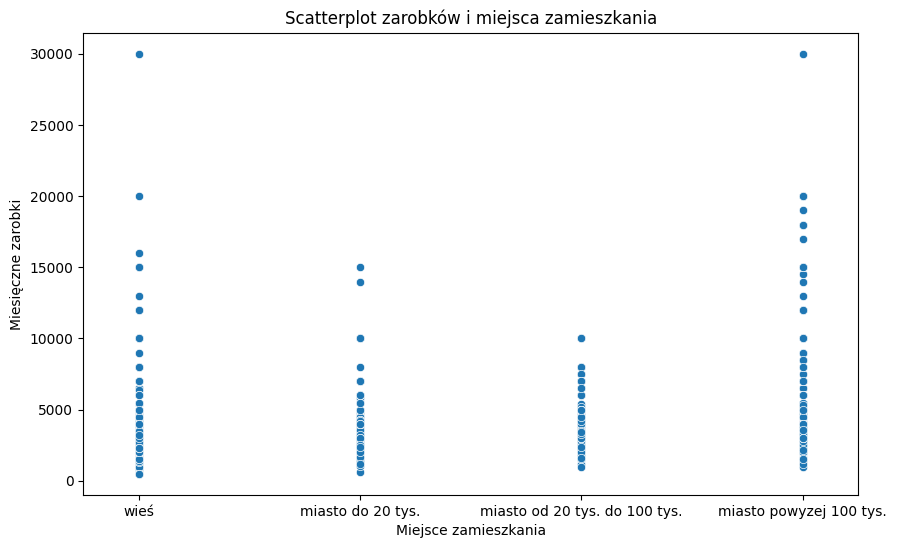

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, y = "pensja", x = 'miejsce')

plt.xlabel('Miejsce zamieszkania')
plt.ylabel('Miesięczne zarobki')
plt.title('Scatterplot zarobków i miejsca zamieszkania')
plt.xticks(wielkosc_kod, wielkosc_label)
plt.xlim(0.75, 4.25)

plt.show()

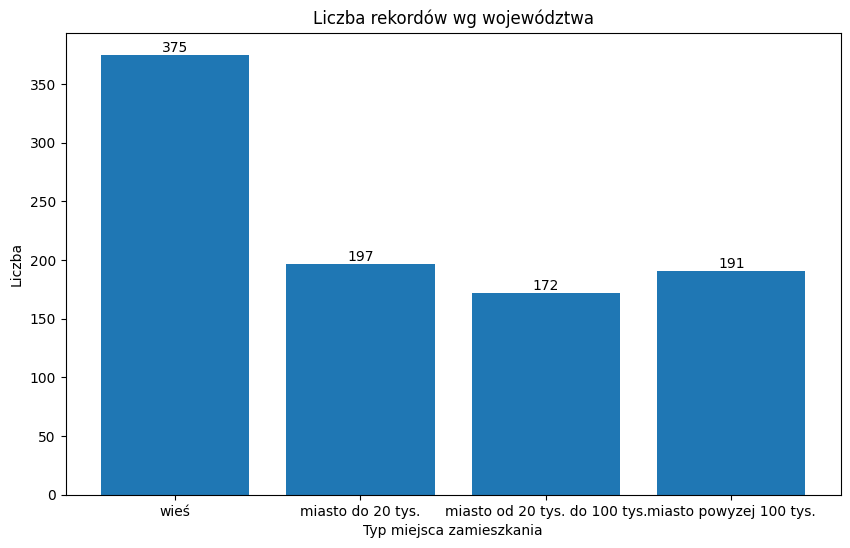

In [18]:
plt.figure(figsize=(10, 6))

unique_values, counts = np.unique(df['miejsce'], return_counts=True)

plt.bar(unique_values, counts)

filtered_values = unique_values[np.isin(unique_values, wielkosc_kod)]
filtered_counts = counts[np.isin(unique_values, wielkosc_kod)]
plt.xticks(filtered_values, wielkosc_label)
plt.xlabel('Typ miejsca zamieszkania')
plt.ylabel('Liczba')
plt.title('Liczba rekordów wg województwa')

for x, y in zip(filtered_values, filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()